In [50]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-bright')
plt.rcParams['text.color'] = 'white'
sns.set_theme(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
dim_customers = pd.read_csv('./Data/dim_customers.csv')
dim_date = pd.read_csv('./Data/dim_date.csv')
dim_products = pd.read_csv('./Data/dim_products.csv')
dim_targets_orders = pd.read_csv('./Data/dim_targets_orders.csv')
fact_order_lines = pd.read_csv('./Data/fact_order_lines.csv')
fact_orders_aggregate = pd.read_csv('./Data/fact_orders_aggregate.csv')

### data profiling

#### dim_customers

In [3]:
dim_customers.head()

,customer_id,customer_name,city
0,789201,Rel Fresh,Surat
1,789202,Rel Fresh,Ahmedabad
2,789203,Rel Fresh,Vadodara
3,789301,Expression Stores,Surat
4,789303,Expression Stores,Vadodara


In [4]:
dim_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    35 non-null     int64 
 1   customer_name  35 non-null     object
 2   city           35 non-null     object
dtypes: int64(1), object(2)
memory usage: 968.0+ bytes


No Null values are present.

In [5]:
dim_customers.customer_name.nunique()

15

In [6]:
dim_customers.customer_name.value_counts()

Rel Fresh            3
Vijay Stores         3
Propel Mart          3
Lotus Mart           3
Acclaimed Stores     3
Expression Stores    2
Coolblue             2
Atlas Stores         2
Chiptec Stores       2
Viveks Stores        2
Info Stores          2
Sorefoz Mart         2
Expert Mart          2
Logic Stores         2
Elite Mart           2
Name: customer_name, dtype: int64

There are 15 customers of FMGC company.5 customers have branches in 2 other cities while 10 customers have branch in other city.

In [7]:
dim_customers.city.value_counts()

Ahmedabad    12
Vadodara     12
Surat        11
Name: city, dtype: int64

customers are from 3 different cities.

#### dim_date

In [8]:
dim_date.head()

,date,mmm_yy,week_no
0,01-Apr-22,01-Apr-22,W 14
1,03-Apr-22,01-Apr-22,W 15
2,04-Apr-22,01-Apr-22,W 15
3,05-Apr-22,01-Apr-22,W 15
4,06-Apr-22,01-Apr-22,W 15


In [9]:
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     183 non-null    object
 1   mmm_yy   183 non-null    object
 2   week_no  183 non-null    object
dtypes: object(3)
memory usage: 4.4+ KB


In [10]:
dim_date['date'] = pd.to_datetime(dim_date['date'],dayfirst=True,format='%d-%b-%y')
dim_date['month'] = dim_date['date'].apply(lambda x: str(x.month))
dim_date['year'] = dim_date['date'].apply(lambda x: str(x.year))

In [11]:
dim_date['weekday'] = dim_date['date'].apply(lambda x:datetime.weekday(x))
dim_date['weekday/weekend'] = ['weekday' if day<=4 else 'weekend' for day in dim_date['weekday']]

In [12]:
dim_date.head(1)

,date,mmm_yy,week_no,month,year,weekday,weekday/weekend
0,2022-04-01,01-Apr-22,W 14,4,2022,4,weekday


#### dim_products

In [13]:
dim_products.head()

,product_name,product_id,category
0,AM Milk 500,25891101,Dairy
1,AM Milk 250,25891102,Dairy
2,AM Milk 100,25891103,Dairy
3,AM Butter 100,25891201,Dairy
4,AM Butter 250,25891202,Dairy


In [14]:
dim_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  18 non-null     object
 1   product_id    18 non-null     int64 
 2   category      18 non-null     object
dtypes: int64(1), object(2)
memory usage: 560.0+ bytes


No Null values are present.

18 products are sold to various customers.

In [15]:
dim_products.product_name.unique()

array(['AM Milk 500', 'AM Milk 250', 'AM Milk 100', 'AM Butter 100',
       'AM Butter 250', 'AM Butter 500', 'AM Ghee 250', 'AM Ghee 150',
       'AM Ghee 100', 'AM Curd 250', 'AM Curd 100', 'AM Curd 50',
       'AM Biscuits 750', 'AM Biscuits 500', 'AM Biscuits 250',
       'AM Tea 500', 'AM Tea 250', 'AM Tea 100'], dtype=object)

In [16]:
dim_products.category.value_counts()

Dairy        12
Food          3
beverages     3
Name: category, dtype: int64

FMGC distributes mostly Dairy products along with Food & Beverages.

#### dim_targets_orders

In [17]:
dim_targets_orders.head()

,customer_id,ontime_target%,infull_target%,otif_target%
0,789201,87,81,70
1,789202,85,81,69
2,789203,92,76,70
3,789301,89,78,69
4,789303,88,78,69


In [18]:
dim_targets_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     35 non-null     int64
 1   ontime_target%  35 non-null     int64
 2   infull_target%  35 non-null     int64
 3   otif_target%    35 non-null     int64
dtypes: int64(4)
memory usage: 1.2 KB


No Null values are present.

In [19]:
# check if any of percent value is greater than 100 or less than 0
cnt = 0
for i in range(0,35):
    if (dim_targets_orders['ontime_target%'][i] > 100) or (dim_targets_orders['ontime_target%'][i]<0):
        cnt +=1
    elif (dim_targets_orders['infull_target%'][i] > 100) or (dim_targets_orders['infull_target%'][i]<0):
        cnt +=1
    elif (dim_targets_orders['otif_target%'][i] > 100) or (dim_targets_orders['otif_target%'][i]<0):
        cnt +=1

print('ambigious_rows:',cnt)

ambigious_rows: 0


#### fact_order_lines

In [20]:
fact_order_lines.head()

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full
0,FMR34203601,"Tuesday, March 1, 2022",789203,25891601,110,"Friday, March 4, 2022","Friday, March 4, 2022",110,1,1,1
1,FMR32320302,"Tuesday, March 1, 2022",789320,25891203,347,"Wednesday, March 2, 2022","Wednesday, March 2, 2022",347,1,1,1
2,FMR33320501,"Tuesday, March 1, 2022",789320,25891203,187,"Thursday, March 3, 2022","Thursday, March 3, 2022",150,0,1,0
3,FMR34220601,"Tuesday, March 1, 2022",789220,25891203,235,"Friday, March 4, 2022","Friday, March 4, 2022",235,1,1,1
4,FMR33703603,"Tuesday, March 1, 2022",789703,25891203,176,"Thursday, March 3, 2022","Thursday, March 3, 2022",176,1,1,1


In [21]:
fact_order_lines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57096 entries, 0 to 57095
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   order_id              57096 non-null  object
 1   order_placement_date  57096 non-null  object
 2   customer_id           57096 non-null  int64 
 3   product_id            57096 non-null  int64 
 4   order_qty             57096 non-null  int64 
 5   agreed_delivery_date  57096 non-null  object
 6   actual_delivery_date  57096 non-null  object
 7   delivery_qty          57096 non-null  int64 
 8   In Full               57096 non-null  int64 
 9   On Time               57096 non-null  int64 
 10  On Time In Full       57096 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 4.8+ MB


In [22]:
# check if any value other than 0 and 1 present in columns 'On Time In Full',
# 'On Time' and 'In Full'.

In [23]:
fact_order_lines['On Time In Full'].value_counts()

0    29716
1    27380
Name: On Time In Full, dtype: int64

In [24]:
fact_order_lines['On Time'].value_counts()

1    40605
0    16491
Name: On Time, dtype: int64

In [25]:
fact_order_lines['In Full'].value_counts()

1    37661
0    19435
Name: In Full, dtype: int64

In [26]:
fact_order_lines['order_placement_date'] = pd.to_datetime(fact_order_lines['order_placement_date'],format='%A, %B %d, %Y')
fact_order_lines['agreed_delivery_date'] = pd.to_datetime(fact_order_lines['agreed_delivery_date'],format='%A, %B %d, %Y')
fact_order_lines['actual_delivery_date'] = pd.to_datetime(fact_order_lines['actual_delivery_date'],format='%A, %B %d, %Y')

In [27]:
# Create a varible toc check if delivery date is leading or trailing with promised date.
fact_order_lines['delivery_gap'] = fact_order_lines['actual_delivery_date'] - fact_order_lines['agreed_delivery_date']
fact_order_lines['delivery_gap'] = [int(gap.days) for gap in fact_order_lines['delivery_gap']]

In [28]:
cnt = 0

for i in range(0,57096):
    # check if delivery date is before promised date i.e. on-time order
    if fact_order_lines['delivery_gap'][i] <=0:
        # delivered qty is same as ordered i.e. in-full order
        # both conditions met so order is on-time in-full
        # so if otif flag is 1 i.e. correct
        if (fact_order_lines['order_qty'][i] == fact_order_lines['delivery_qty'][i]) and (fact_order_lines['On Time In Full'][i] ==1):
            cnt +=1
        else:
        # order not in-full, so only 'On Time' flag should be 1
            if fact_order_lines['On Time'][i] == 1:
                cnt +=1
    # if order not delivered on time
    elif fact_order_lines['delivery_gap'][i] >0:
    # But delivered in full, so only 'in full' flag should be 1 
        if (fact_order_lines['order_qty'][i] == fact_order_lines['delivery_qty'][i]) and (fact_order_lines['In Full'][i] == 1):
            cnt +=1
    # order neither on-time nor in-full i.e. all flags are 0
        elif (fact_order_lines['On Time In Full'][i] == 0) and (fact_order_lines['On Time'][i]==0) and (fact_order_lines['In Full'][i]==0):
            cnt +=1

print('rows satisfying at least one condition:',cnt)

rows satisfying at least one condition: 57096


#### fact_orders_aggregate

In [29]:
fact_orders_aggregate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31729 entries, 0 to 31728
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   order_id              31729 non-null  object
 1   customer_id           31729 non-null  int64 
 2   order_placement_date  31729 non-null  object
 3   on_time               31729 non-null  int64 
 4   in_full               31729 non-null  int64 
 5   otif                  31729 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.5+ MB


No null values are present in any table.

In [30]:
# check if values in columns 'otif','on_time' and 'in_full' are other than 0 and 1.

In [31]:
fact_orders_aggregate['otif'].value_counts()

0    22521
1     9208
Name: otif, dtype: int64

In [32]:
fact_orders_aggregate['on_time'].value_counts()

1    18730
0    12999
Name: on_time, dtype: int64

In [33]:
fact_orders_aggregate['in_full'].value_counts()

1    16747
0    14982
Name: in_full, dtype: int64

In [34]:
# check if below conditions are not satisfied in any row
# 1. order is neither on-time nor in-full i.e all flags are zero i.e sum=0
# 2. order is either on-time or in-full i.e. only one flag is one i.e. sum=1
# 3. order is both on-time and in-full i.e. all flags are one i.e. sum=3
# if not, the entry is ambigious when sum =2
ambigious_rows_count = 0
ambigious_rows = []

for i in range(0,31729):
    if (fact_orders_aggregate['otif'][i] + fact_orders_aggregate['on_time'][i] + fact_orders_aggregate['in_full'][i]) == 2:
        ambigious_rows_count +=1
        ambigious_rows.append(i)

print('ambigious rows:',ambigious_rows_count)
print(ambigious_rows)

ambigious rows: 0
[]


### data analysis

In [35]:
# cutomers + products + order_lines
df1 = fact_order_lines.merge(
            dim_date,
            left_on='order_placement_date',
            right_on = 'date',
            how = 'left'
        ).merge(
            dim_customers,
            on = 'customer_id',
            how='left'
        ).merge(
            dim_products,
            on= 'product_id',
            how = 'left'
        )

In [42]:
df1.head(2)

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,...,mmm_yy,week_no,month,year,weekday,weekday/weekend,customer_name,city,product_name,category
0,FMR34203601,2022-03-01,789203,25891601,110,2022-03-04,2022-03-04,110,1,1,...,01-Mar-22,W 10,3,2022,1,weekday,Rel Fresh,Vadodara,AM Tea 500,beverages
1,FMR32320302,2022-03-01,789320,25891203,347,2022-03-02,2022-03-02,347,1,1,...,01-Mar-22,W 10,3,2022,1,weekday,Chiptec Stores,Surat,AM Butter 500,Dairy


In [36]:
# dataframe for OT,IF,OTIF performance for each customer
df = fact_orders_aggregate.groupby('customer_id')[['otif','on_time','in_full']].sum().reset_index()
df['total_orders'] = df['otif'] + df['on_time'] + df['in_full']
df['otif%'] = np.round(df['otif']*100/df['total_orders'],0).astype(int)
df['on_time%'] = np.round(df['on_time']*100/df['total_orders'],0).astype(int)
df['in_full%'] = np.round(df['in_full']*100/df['total_orders'],0).astype(int)

# merging with target performance dataframe and customers dataframe
df2 = df.merge(
    dim_targets_orders,
    on = 'customer_id',
    how='left'
).merge(
    dim_customers,
    on = 'customer_id',
    how='left'
) 
df2.head(2)

,customer_id,otif,on_time,in_full,total_orders,otif%,on_time%,in_full%,ontime_target%,infull_target%,otif_target%,customer_name,city
0,789101,313,596,479,1388,23,43,35,86,80,69,Vijay Stores,Surat
1,789102,299,581,485,1365,22,43,36,90,81,73,Vijay Stores,Ahmedabad


##### Q1. overall metrics

In [37]:
# Total Orders are total data in fact_orderd_aggregate
total_orders = fact_orders_aggregate.shape[0]

# Total Qty ordered
total_qty_ordered = fact_order_lines['order_qty'].sum()

# Total Qty delivered
total_qty_delivered = fact_order_lines['delivery_qty'].sum()

# Total Avg. delivery_gap
Overall_avg_delivery_gap  = fact_order_lines['delivery_gap'].mean()

# Total OTIF%
Overall_OTIF_perc = fact_orders_aggregate['otif'].sum()*100/total_orders

# Total OT%
Overall_OT_perc = fact_orders_aggregate['on_time'].sum()*100/total_orders

# Total IF%
Overall_IF_perc = fact_orders_aggregate['in_full'].sum()*100/total_orders

print('Total Orders:',total_orders)
print('Total ordered Qty:',total_qty_ordered)
print('Total qty delivered:',total_qty_delivered)
print('Overall Avg. delivery gap:',Overall_avg_delivery_gap)
print('Overall OTIF% :',Overall_OTIF_perc)
print('Overall OT% :',Overall_OT_perc)
print('Overall IF% :',Overall_IF_perc)

Total Orders: 31729
Total ordered Qty: 13426936
Total qty delivered: 12969157
Overall Avg. delivery gap: 0.4241978422306291
Overall OTIF% : 29.02076964291342
Overall OT% : 59.03117022282454
Overall IF% : 52.78136720350468


##### Q2. Weekend V/S Weekdays 

In [38]:
df1['weekday/weekend'].value_counts()

weekday    40757
weekend    16339
Name: weekday/weekend, dtype: int64

Text(0.5, 1.0, 'Total Orders : Weekday v/s Weekend')

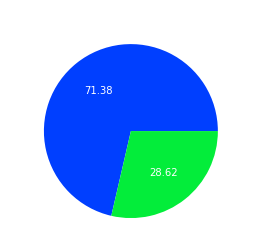

In [39]:
plt.pie(x = df1['weekday/weekend'].value_counts(),
        labels = df1['weekday/weekend'].value_counts().index,
        autopct = '%.2f'
    )
plt.title('Total Orders : Weekday v/s Weekend',fontweight='bold')

##### Q3. Performace By Products

In [44]:
df = df1.groupby('product_name')[['order_qty','delivery_qty']].sum().reset_index()
df = pd.melt(
    df,
    id_vars = 'product_name',
    value_vars = ['order_qty','delivery_qty'],
    var_name = 'qty_type',
    value_name = 'qty'
    )
df.head(2)

,product_name,qty_type,qty
0,AM Biscuits 250,order_qty,563366
1,AM Biscuits 500,order_qty,558119


Text(0, 0.5, 'Quantity')

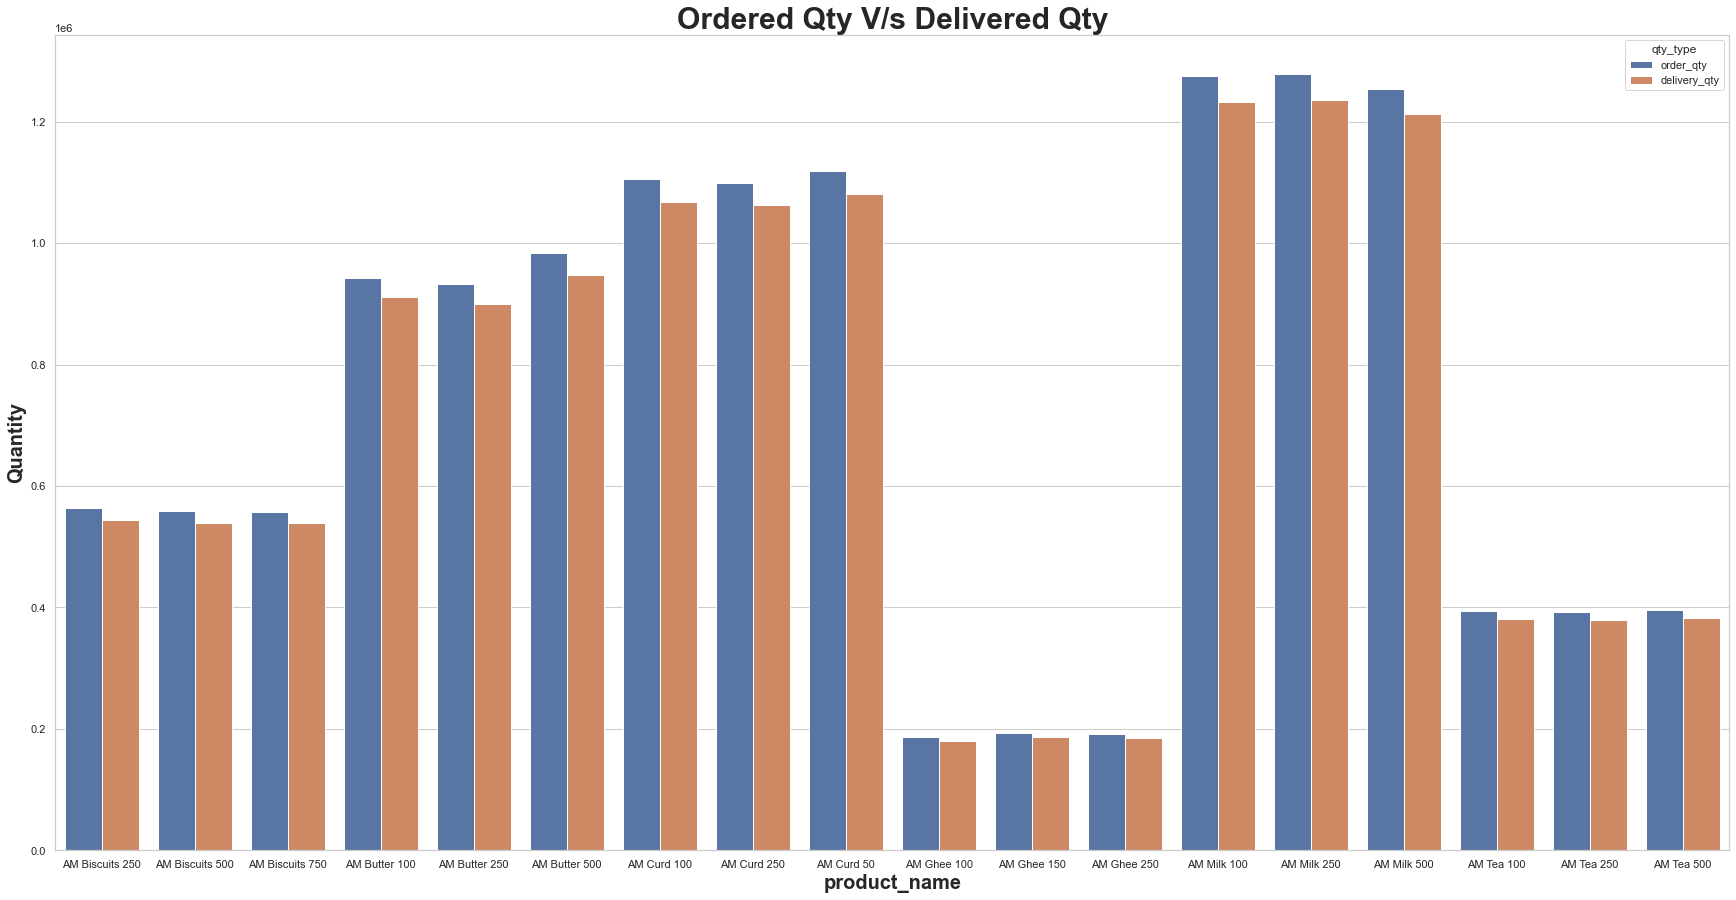

In [55]:
plt.figure(figsize=(30,15))
sns.barplot(
    data = df,
    x = 'product_name',
    y = 'qty',
    hue = 'qty_type'
)
plt.title('Ordered Qty V/s Delivered Qty',fontsize=30,fontweight='bold')
plt.xlabel(xlabel = 'product_name',fontsize=20,fontweight='bold')
plt.ylabel(ylabel = 'Quantity',fontsize=20,fontweight='bold')

##### Q4. Performance by Category

In [58]:
df = df1.groupby('category')[['order_qty','delivery_qty']].sum().reset_index()
df['order_fill_perc'] = df['delivery_qty']*100/df['order_qty']
df.head(1)

,category,order_qty,delivery_qty,order_fill_perc
0,Dairy,10564711,10204241,96.58798


[]

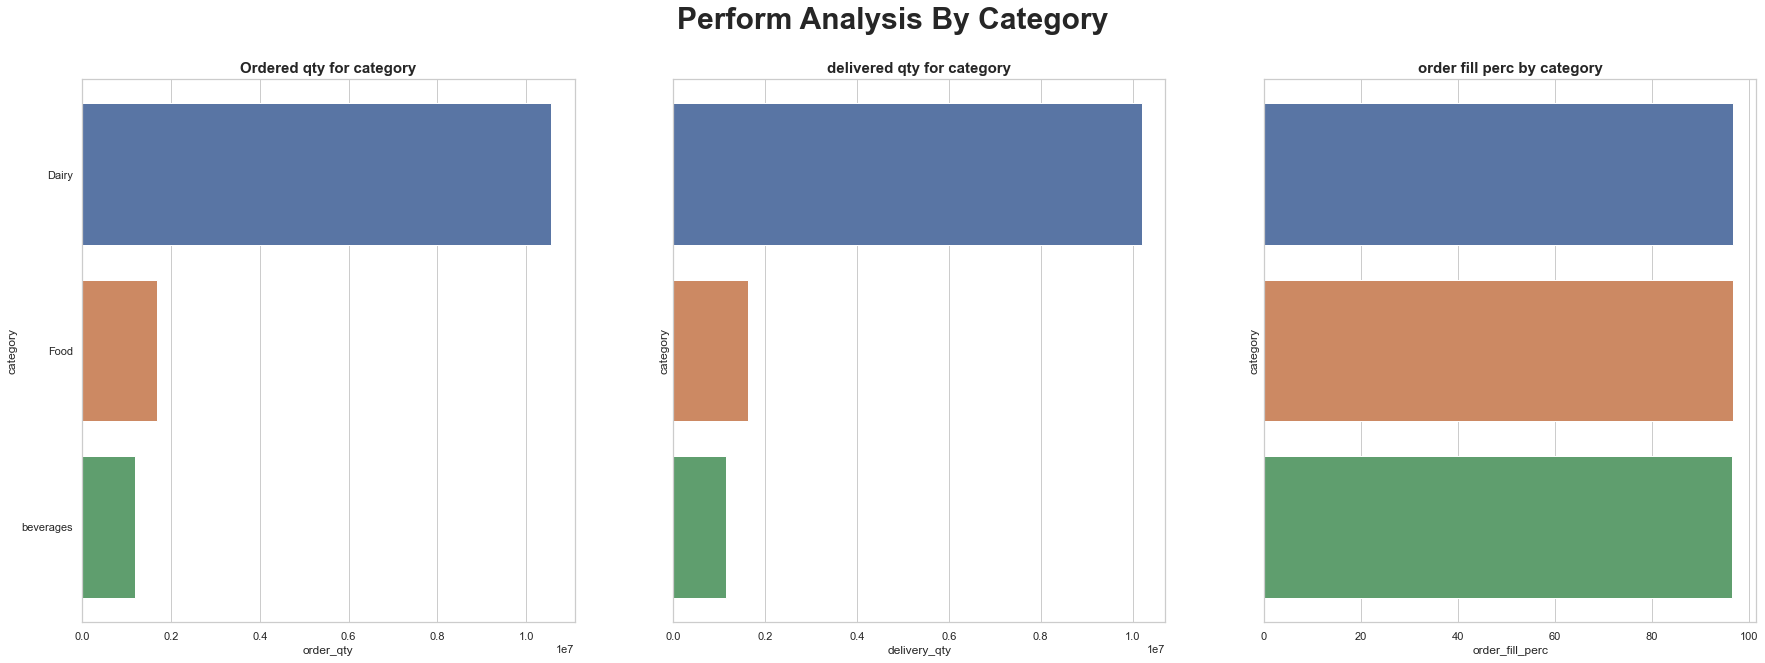

In [73]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,10),sharey=True)

# ax1 = plt.plot(
#     x = df['order_qty'],
#     labels = df['category'],
#     autopct = '%.2f'
# )

# ax2 = plt.pie(
#     x = df['delivery_qty'],
#     labels = df['category'],
#     autopct = '%.2f'
# )
sns.barplot(
    x = df['order_qty'],
    y = df['category'],
    orient = 'h',
    ax=ax1
)

sns.barplot(
    x = df['delivery_qty'],
    y = df['category'],
    orient = 'h',
    ax=ax2
)

sns.barplot(
    x = df['order_fill_perc'],
    y = df['category'],
    orient = 'h',
    ax=ax3
)

ax1.set_title('Ordered qty for category',fontsize=15,fontweight='bold')
ax2.set_title('delivered qty for category',fontsize=15,fontweight='bold')
ax3.set_title('order fill perc by category',fontsize=15,fontweight='bold')

plt.suptitle('Perform Analysis By Category',fontsize=30,fontweight='bold')
plt.plot()

##### Q5. Performance by city

In [74]:
df = df1.groupby('city')[['order_qty','delivery_qty']].sum().reset_index()
df['order_fill_perc'] = df['delivery_qty']*100/df['order_qty']
df.head(1)

,city,order_qty,delivery_qty,order_fill_perc
0,Ahmedabad,4612298,4462984,96.762698


[]

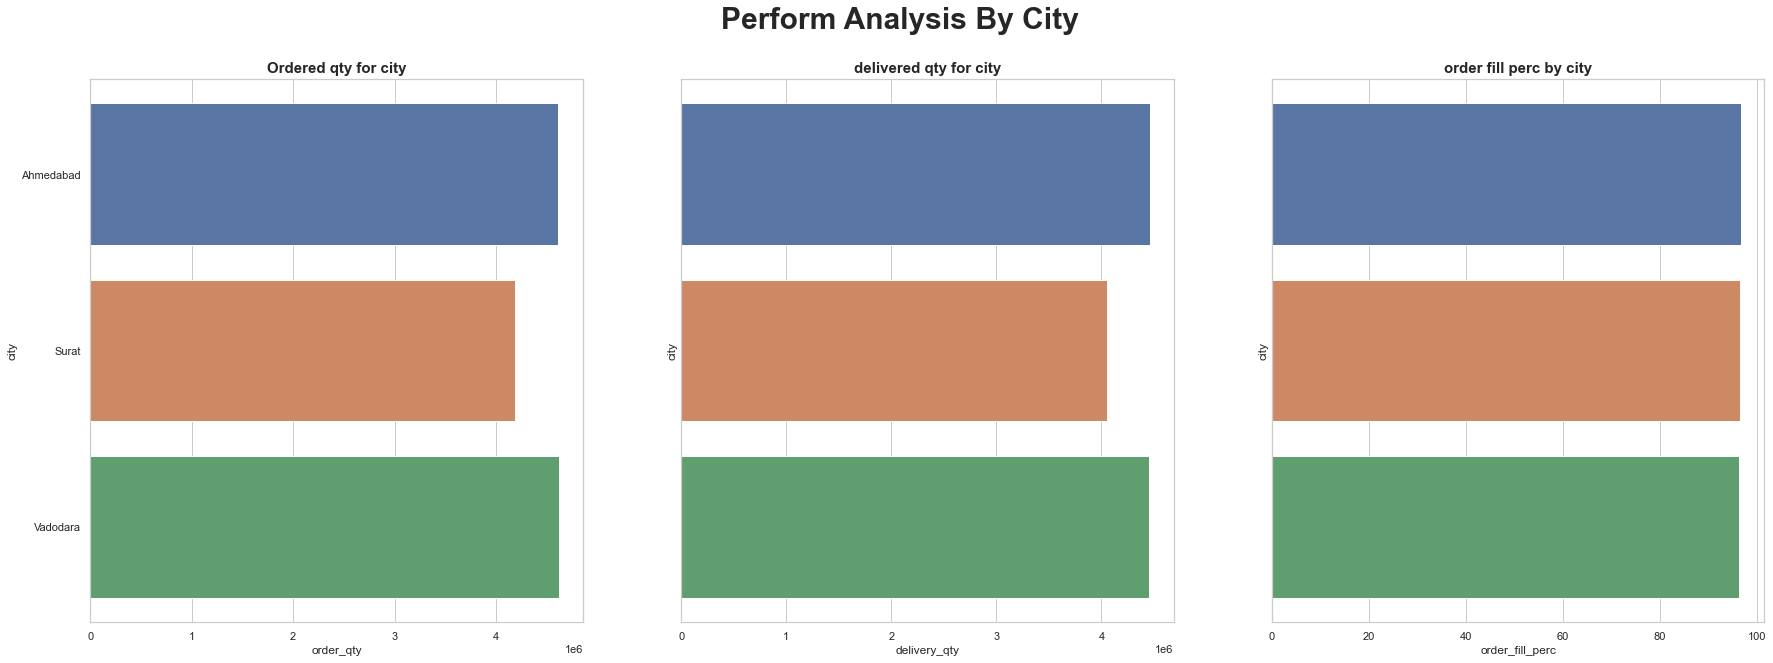

In [75]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,10),sharey=True)

sns.barplot(
    x = df['order_qty'],
    y = df['city'],
    orient = 'h',
    ax=ax1
)

sns.barplot(
    x = df['delivery_qty'],
    y = df['city'],
    orient = 'h',
    ax=ax2
)

sns.barplot(
    x = df['order_fill_perc'],
    y = df['city'],
    orient = 'h',
    ax=ax3
)

ax1.set_title('Ordered qty for city',fontsize=15,fontweight='bold')
ax2.set_title('delivered qty for city',fontsize=15,fontweight='bold')
ax3.set_title('order fill perc by city',fontsize=15,fontweight='bold')

plt.suptitle('Perform Analysis By City',fontsize=30,fontweight='bold')
plt.plot()